# Simple Equilibrium

This is a simple equilibrium model as an example. Here, we explain how to model and run a simulation without using decorators (`species_attributes` and `reaction_rules`) and `run_simulation` method.

In [1]:
%matplotlib inline
from ecell4 import *
from ecell4_base.core import *
from ecell4_base import *

Choose one module from a list of methods supported on E-Cell4.

In [2]:
# f = gillespie.Factory
# f = ode.Factory()
# f = spatiocyte.Factory()
# f = bd.Factory()
# f = meso.Factory()
f = egfrd.Factory()

Set up parameters:

In [3]:
L, N, kd, U, D, radius = 1.0, 60, 0.1, 0.5, 1.0, 0.01
volume = L * L * L
ka = kd * volume * (1 - U) / (U * U * N)

sp1, sp2, sp3 = Species("A", radius, D), Species("B", radius, D), Species("A_B", radius, D)
rr1, rr2 = create_binding_reaction_rule(sp1, sp2, sp3, ka), create_unbinding_reaction_rule(sp3, sp1, sp2, kd)

Create a model:

In [4]:
m = NetworkModel()
m.add_species_attribute(sp1)
m.add_species_attribute(sp2)
m.add_species_attribute(sp3)
m.add_reaction_rule(rr1)
m.add_reaction_rule(rr2)

Create a world and simulator:

In [5]:
w = f.world(Real3(L, L, L))
w.bind_to(m)
w.add_molecules(Species("A"), N)
w.add_molecules(Species("B"), N)

sim = f.simulator(w)
sim.set_dt(1e-3) #XXX: This is too large to get the accurate result with BDSimulator.

Run a simulation:

In [6]:
next_time, dt = 0.0, 0.05
data = [(w.t(), w.num_molecules(sp1), w.num_molecules(sp2), w.num_molecules(sp3))]
for i in range(100):
    next_time += dt
    while (sim.step(next_time)): pass
    data.append((w.t(), w.num_molecules(sp1), w.num_molecules(sp2), w.num_molecules(sp3)))

Plot with Matplotlib:

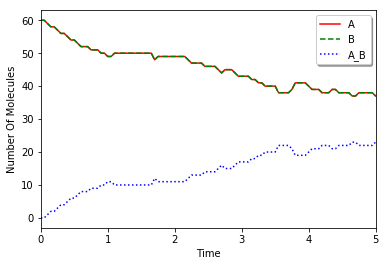

In [7]:
import matplotlib.pylab as plt
from numpy import array

data = array(data)
plt.plot(data.T[0], data.T[1], "r-", label=sp1.serial())
plt.plot(data.T[0], data.T[2], "g--", label=sp2.serial())
plt.plot(data.T[0], data.T[3], "b:", label=sp3.serial())
plt.xlabel("Time")
plt.ylabel("Number Of Molecules")
plt.xlim(data.T[0][0], data.T[0][-1])
plt.legend(loc="best", shadow=True)
plt.show()

See also [Reversible](../../Tests/Reversible.ipynb) and <a href="../../Tests/Reversible (Diffusion-limited).ipynb">Reversible (Diffusion-limited)</a> in the Tests section for more detailed comparisons between methods.